**MOVIE RECOMMENDER SYSTEM**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as seaborn

Importing ratings.csv which contains ratings given by the users to the movies they watched

In [ ]:
rating = pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movie = pd.read_csv('movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


merging both the datasets and considering movieID primarilty and arrnging based on it

In [ ]:
movie_rating = pd.merge(left=rating, right=movie, on='movieId')
movie_rating.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [ ]:
movie_rating.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

Getting the columns of the movie_rating dataframe in proper order

In [ ]:
movie_rating = movie_rating[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]
movie_rating.head()

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483


Exploratory data analysis

In [ ]:
movie_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   title      100836 non-null  object 
 3   genres     100836 non-null  object 
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [ ]:
movie_rating.isnull().sum()

userId       0
movieId      0
title        0
genres       0
rating       0
timestamp    0
dtype: int64

Creating dataframe with number of ratings and average rating for each movie

In [ ]:
average_rating_movie = movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False)

In [ ]:
average_rating_movie.head(10)

title
Gena the Crocodile (1969)                    5.0
True Stories (1986)                          5.0
Cosmic Scrat-tastrophe (2015)                5.0
Love and Pigeons (1985)                      5.0
Red Sorghum (Hong gao liang) (1987)          5.0
Thin Line Between Love and Hate, A (1996)    5.0
Lesson Faust (1994)                          5.0
Eva (2011)                                   5.0
Who Killed Chea Vichea? (2010)               5.0
Siam Sunset (1999)                           5.0
Name: rating, dtype: float64

Maximum movies have average rating in the range 3 to 4.

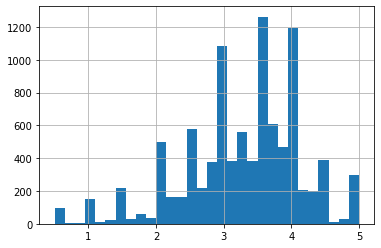

In [ ]:
average_rating_movie.hist(bins=30)
plt.show()

In [ ]:
count_userid = movie_rating.groupby('title')['userId'].count().sort_values(ascending=False)
count_userid

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: userId, Length: 9719, dtype: int64

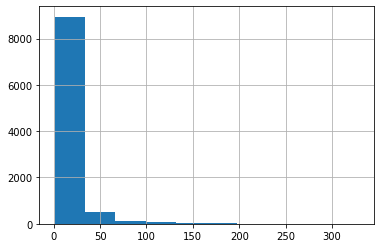

In [ ]:
count_userid.hist()
plt.show()

The movies which have average = 5.0 may be the ones which may have been watched once or twice. Let's see number of ratings given to movies which have average rating = 5.0

In [ ]:
for movie in average_rating_movie[average_rating_movie==5.0].index:
  print(movie, count_userid[movie])

Gena the Crocodile (1969) 1
True Stories (1986) 1
Cosmic Scrat-tastrophe (2015) 1
Love and Pigeons (1985) 1
Red Sorghum (Hong gao liang) (1987) 1
Thin Line Between Love and Hate, A (1996) 1
Lesson Faust (1994) 2
Eva (2011) 1
Who Killed Chea Vichea? (2010) 1
Siam Sunset (1999) 1
Ex Drummer (2007) 1
Reform School Girls (1986) 1
Buzzard (2015) 1
Hellbenders (2012) 1
Heidi Fleiss: Hollywood Madam (1995) 2
My Left Eye Sees Ghosts (Ngo joh aan gin diy gwai) (2002) 1
Animals are Beautiful People (1974) 1
My Life as McDull (Mak dau goo si) (2001) 1
My Love (2006) 1
My Man Godfrey (1957) 1
Continental Divide (1981) 1
My Sassy Girl (Yeopgijeogin geunyeo) (2001) 1
Trinity and Sartana Are Coming (1972) 1
Calcium Kid, The (2004) 1
Connections (1978) 1
Superman/Batman: Public Enemies (2009) 1
Mystery of the Third Planet, The (Tayna tretey planety) (1981) 1
Mr. Skeffington (1944) 1
Shogun Assassin (1980) 1
Tickling Giants (2017) 1
Entertaining Angels: The Dorothy Day Story (1996) 1
Crippled Avengers 

In [ ]:
userid_rating = movie_rating.groupby('title')[['userId', 'rating']].agg({'userId':'count', 'rating':'mean'}).round(2).sort_values(by='userId', ascending=False)
userid_rating.head()

,userId,rating
title,,
Forrest Gump (1994),329,4.16
"Shawshank Redemption, The (1994)",317,4.43
Pulp Fiction (1994),307,4.20
"Silence of the Lambs, The (1991)",279,4.16
"Matrix, The (1999)",278,4.19


Building Recommendation System
There will be many Nan values because users have watched only few of the movies and given ratings only to those movies

In [ ]:
movie_rating_pivot = pd.pivot_table(index="userId", columns='title', values='rating', data=movie_rating)
movie_rating_pivot.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
userid_rating.head(10)

,userId,rating
title,,
Forrest Gump (1994),329,4.16
"Shawshank Redemption, The (1994)",317,4.43
Pulp Fiction (1994),307,4.20
"Silence of the Lambs, The (1991)",279,4.16
"Matrix, The (1999)",278,4.19
Star Wars: Episode IV - A New Hope (1977),251,4.23
Jurassic Park (1993),238,3.75
Braveheart (1995),237,4.03
Terminator 2: Judgment Day (1991),224,3.97


Let's find which movies to recommend to the users who have watched 'Jurassic Park (1993)'. To do this we have to find correlation of 'Jurassic Park (1993)' with other movies which have been rated in a similar way by the users.

In [ ]:
jurassic_park = movie_rating_pivot['Jurassic Park (1993)'].head(20)

In [ ]:
jurassic_park.head(20)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     4.0
9     NaN
10    NaN
11    4.0
12    NaN
13    NaN
14    3.0
15    NaN
16    NaN
17    4.5
18    3.5
19    2.0
20    NaN
Name: Jurassic Park (1993), dtype: float64

In [ ]:
correlation_jurassicpark = pd.DataFrame(movie_rating_pivot.corrwith(jurassic_park))

In [ ]:
correlation_jurassicpark.head(10)

,0
title,
'71 (2014),NaN
'Hellboy': The Seeds of Creation (2004),NaN
'Round Midnight (1986),NaN
'Salem's Lot (2004),NaN
'Til There Was You (1997),NaN
'Tis the Season for Love (2015),NaN
"'burbs, The (1989)",NaN
'night Mother (1986),NaN
(500) Days of Summer (2009),NaN


In [ ]:
correlation_jurassicpark.columns = ['Correlation']
correlation_jurassicpark.dropna(inplace=True, axis=0)

In [ ]:
correlation_jurassicpark.sort_values(by='Correlation', ascending=True).head()

,Correlation
title,
Once Upon a Time in the West (C'era una volta il West) (1968),-1.0
"Crow, The (1994)",-1.0
"Bourne Supremacy, The (2004)",-1.0
"Matrix Revolutions, The (2003)",-1.0
Matilda (1996),-1.0


In [ ]:
correlation_jurassicpark['Views'] = userid_rating['userId']

Now filtering out top 20 movies which have views greater than 100

In [ ]:
#a = int(input("Enter the value for views: "))
correlation_jurassicpark[correlation_jurassicpark['Views'] > 100].sort_values(by='Correlation', ascending=False).head(20)

,Correlation,Views
title,,
Monty Python and the Holy Grail (1975),1.000000,136
Crimson Tide (1995),1.000000,103
Harry Potter and the Chamber of Secrets (2002),1.000000,102
American Pie (1999),1.000000,103
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),1.000000,107
"Incredibles, The (2004)",1.000000,125
Jurassic Park (1993),1.000000,238
"Rock, The (1996)",1.000000,121
Ghostbusters (a.k.a. Ghost Busters) (1984),1.000000,120
